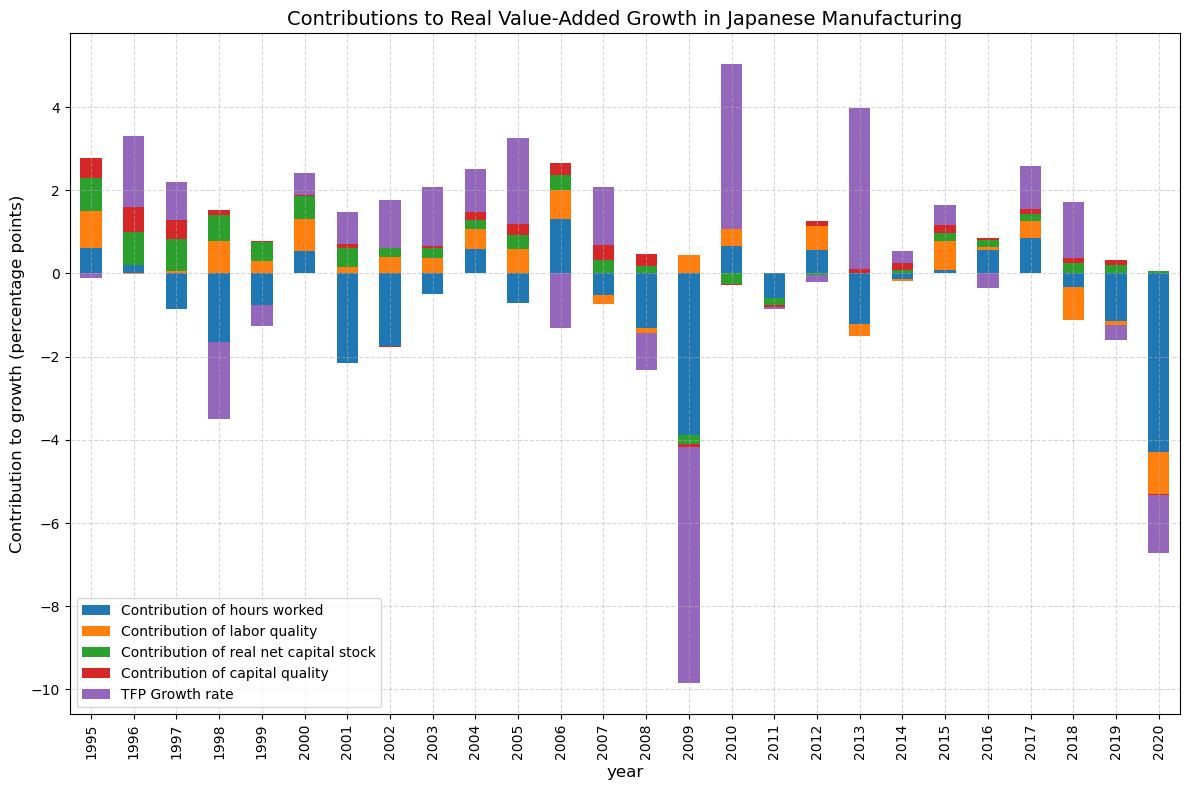

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

excel_file_path = "./data/japan/jn_growth_accounting.xlsx"

def extract_manufacturing_sector(sheet_name: str, header: int = 1):
  """
    This function assumes that every instrument has aggregated sector,
    and manufacturing sectors are located at 203th row.
  """
  df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=header, index_col=0)
  manufacturing =  df.loc[203].dropna()
  manufacturing.index = manufacturing.index.astype(str)
  manufacturing = pd.to_numeric(manufacturing["1995": "2020"], errors="coerce")
  return manufacturing


instruments = {
  "VConH": "Contribution of hours worked",
  "VConLC": "Contribution of labor quality",
  "VConK_T": "Contribution of real net capital stock",
  "VConKC": "Contribution of capital quality",
  "TFPva": "TFP Growth rate",
}

manufacturing_growth_contributor = pd.DataFrame({ instrument: extract_manufacturing_sector(sheet_name) * 100 for sheet_name, instrument in instruments.items() })
manufacturing_growth_contributor.plot(kind="bar", stacked=True, figsize=(12,8))

plt.title("Contributions to Real Value-Added Growth in Japanese Manufacturing", fontsize=14)
plt.xlabel("year", fontsize=12)
plt.ylabel("Contribution to growth (percentage points)", fontsize=12)
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




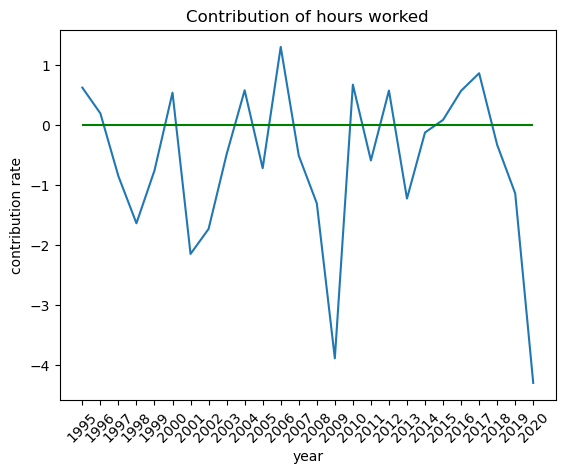

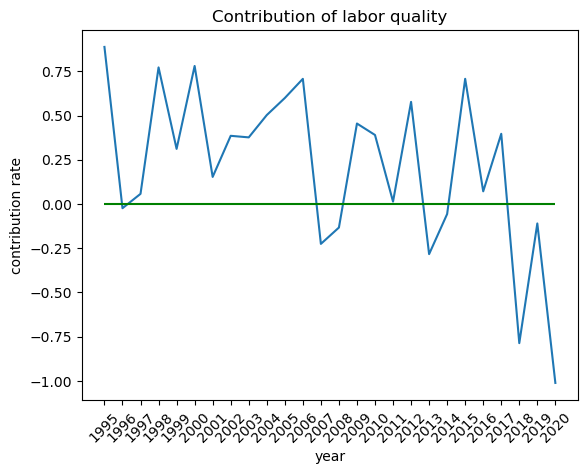

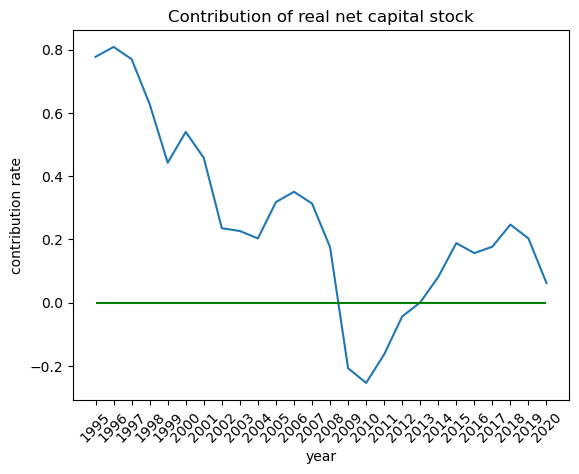

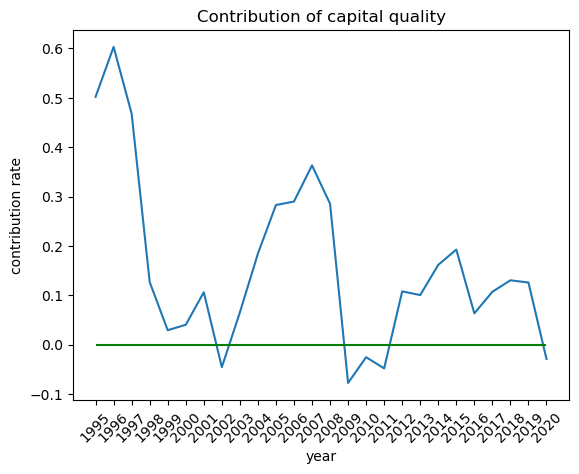

In [26]:
from matplotlib import pyplot as plt
for col in manufacturing_growth_contributor.columns:
  if col.find("TFP") != -1:
    continue
  plt.figure()
  plt.plot(manufacturing_growth_contributor[col])
  plt.title(col)
  plt.xlabel("year")
  plt.ylabel("contribution rate")
  plt.xticks(rotation=45)
  plt.hlines(0, manufacturing_growth_contributor[col].index[0], manufacturing_growth_contributor[col].index[-1], color="green")
  plt.show()


/opt/conda/lib/python3.13/site-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


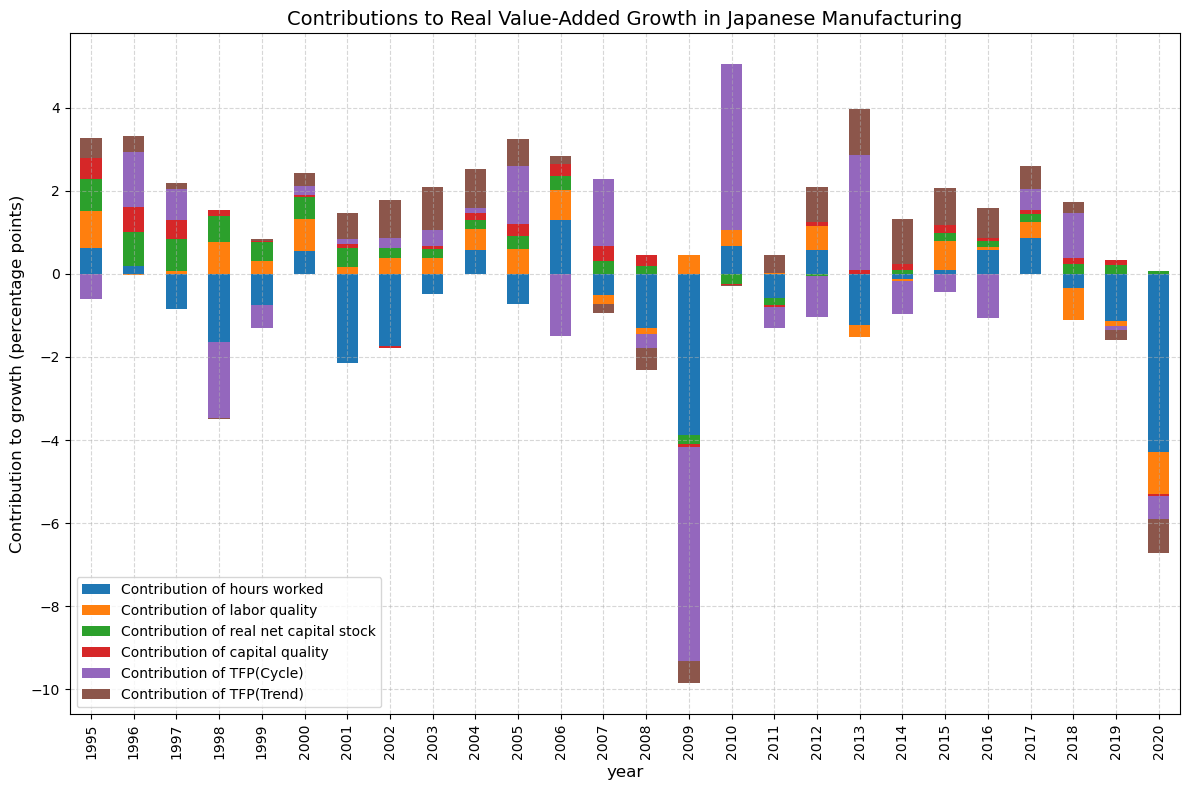

<Axes: title={'center': 'TFP Trend'}, xlabel='year'>

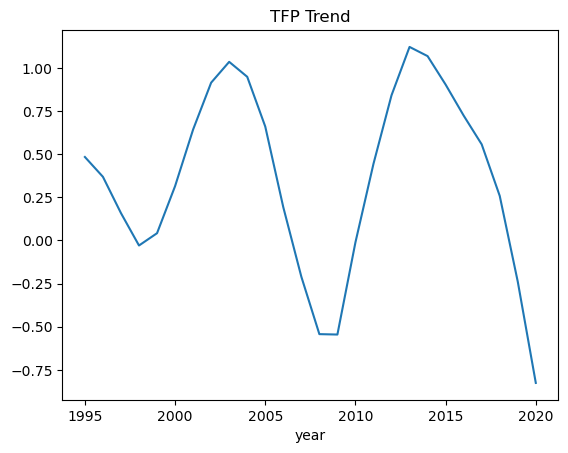

In [17]:
from analysis import utils

cycle, trend = utils.hp_filter_trend(manufacturing_growth_contributor["TFP Growth rate"], "yearly", True)
decomposed_trend_contributor = manufacturing_growth_contributor[["Contribution of hours worked", "Contribution of labor quality", "Contribution of real net capital stock", "Contribution of capital quality"]]
decomposed_trend_contributor["Contribution of TFP(Cycle)"] = cycle
decomposed_trend_contributor["Contribution of TFP(Trend)"] = trend
decomposed_trend_contributor.plot(kind="bar", stacked=True, figsize=(12,8))


plt.title("Contributions to Real Value-Added Growth in Japanese Manufacturing", fontsize=14)
plt.xlabel("year", fontsize=12)
plt.ylabel("Contribution to growth (percentage points)", fontsize=12)
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

decomposed_trend_contributor["Contribution of TFP(Trend)"].plot(title="TFP Trend", xlabel="year")


In [18]:
import pandas as pd
from pathlib import Path

# 保存先のパスをPathオブジェクトとして定義
# 現在のディレクトリからの相対パス
output_dir = Path('./analysis/result/jn_manufac') 
output_file = output_dir / 'growth_accounting.csv' # スラッシュでパスを結合できる
output_df = decomposed_trend_contributor.copy()
output_df.insert(0, "year", output_df.index)

# 親フォルダーが存在しない場合は作成する (parents=Trueで階層があってもOK)
output_dir.mkdir(parents=True, exist_ok=True)

# CSVとして保存
output_df.to_csv(output_file, index=False, encoding='utf-8')
